In [22]:
from model import Model
from data import MNIST
import torch
import matplotlib.pyplot as plt

model = Model([1,28,28], 1000, 0.0001, 0.02)
dataset = MNIST()

model.load_model("diffusion_model")

Model loaded!


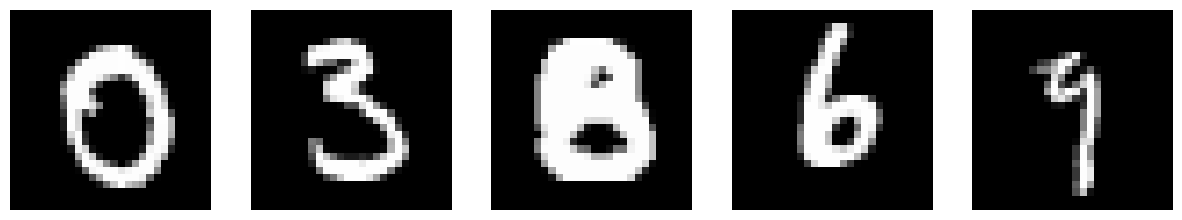

In [23]:
xs = dataset[torch.randint(0, len(dataset), (5,))]
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axs):
    ax.imshow(xs[i].reshape(28, 28), cmap='gray')
    ax.axis('off') 

In [24]:
ts = model.sample_time_steps(5)
noisy_xs, eps = model.make_noisy_image(xs, ts)

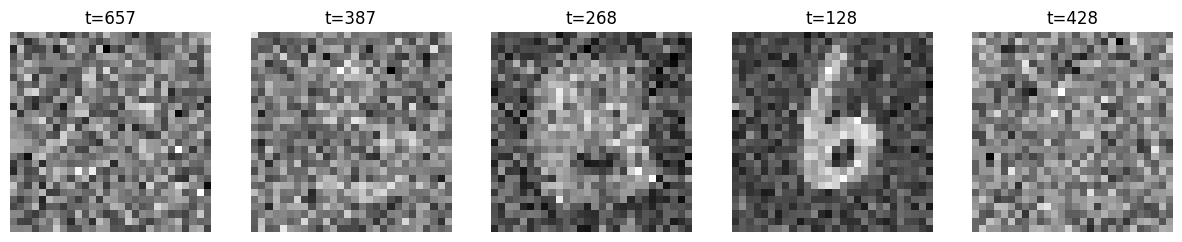

In [25]:
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axs):
    ax.imshow(noisy_xs[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"t={ts[i]}")
    ax.axis('off')

In [26]:
## x_t = x_0 + noise  =>   x_0 = x_t - noise
reconstructed = noisy_xs - model.sqrt_one_minus_alpha_hat[ts].view(-1,1) * eps

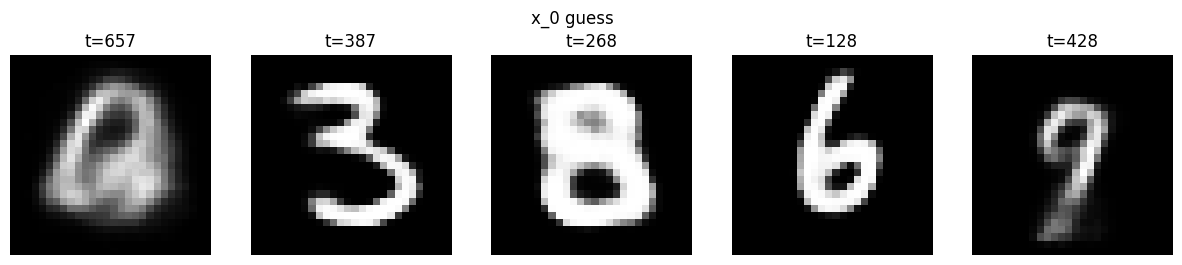

In [29]:
t_enc = model.time_encoding(ts)
x0_guess = model(noisy_xs, t_enc).detach()
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
fig.suptitle("x_0 guess")
for i, ax in enumerate(axs):
    ax.imshow(x0_guess[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"t={ts[i]}")
    ax.axis('off')


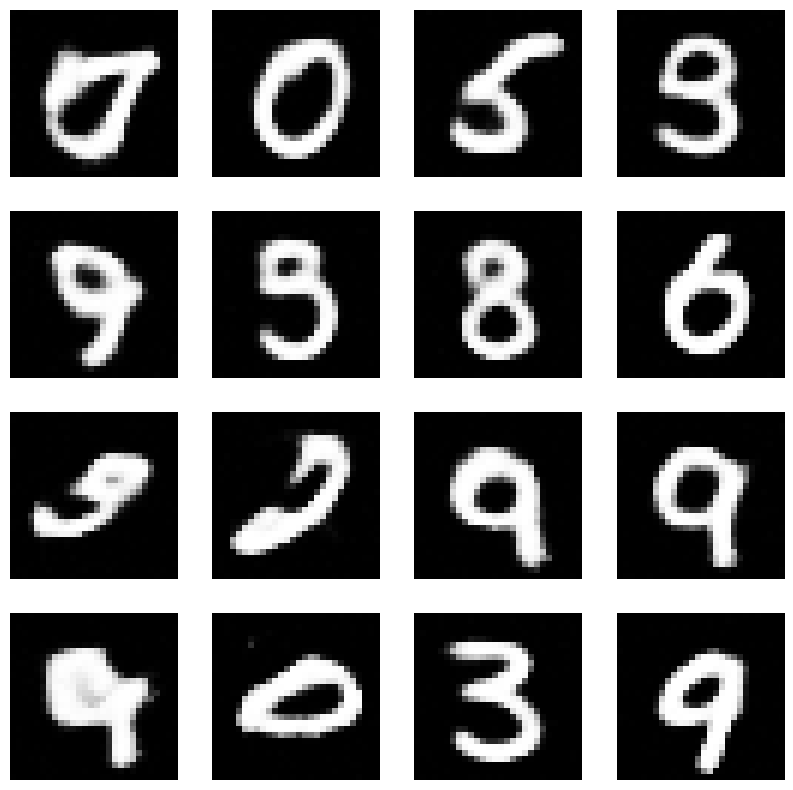

In [30]:
samples = [model.sample_image() for _ in range(16)]
fig, axs = plt.subplots(4, 4, figsize=(10, 10))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(samples[i].reshape(28, 28), cmap='gray')
    ax.axis('off')